<a href="https://colab.research.google.com/github/kavyasasikumar07/ML-basics/blob/main/EDA_and_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Sum along axis 0 rows (vertically)
sum_along_columns = df.sum(axis=0)

# Sum along axis 1 (hori)
sum_along_rows = df.sum(axis=1)

print("Sum along columns:")
print(sum_along_columns)

print("Sum along rows:")
print(sum_along_rows)


Sum along columns:
A     6
B    15
C    24
dtype: int64
Sum along rows:
0    12
1    15
2    18
dtype: int64


In [ ]:
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [ ]:
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


# Exploratory Data Analysis

### What is EDA?
EDA is typically the first step in understanding and familiarizing yourself with a dataset. Its primary purpose is to
- Gain insights into the data,
- Identify patterns,
- Identify anomalies and
- Understand the relationships within the data,

and make informed decisions about how to preprocess and transform the data for machine learning.

### How to do EDA?
EDA involves tasks such as
- Data Cleaning/Preparation/Wrangling,
- Data Exploration, and
- Data Visualization.


### Why do EDA?
EDA helps you understand the nature of your data, which can guide subsequent data preparation and feature engineering steps.

## Data Preparation / Data Cleaning

Data preparation is a broader phase that includes several steps to ensure the data is ready for machine learning algorithms. This phase encompasses activities such as data cleaning, handling missing values, encoding categorical variables, scaling or normalizing numerical features, splitting the data into training and testing sets, and addressing issues like data leakage. Data preparation aims to create a clean, structured, and well-formatted dataset that can be used for model training.

- Handling missing values,
- Normalization,
- Standardisation, and
- Identifying outliers

### Data

From 1985 Ward's Automotive Yearbook: https://archive.ics.uci.edu/dataset/10/automobile

- Dataset Characteristics: Multivariate
- Subject Area: Other
- Associated Tasks: Regression
- Feature Type: Categorical, Integer, Real
- Instances: 205
- Features: 26

**Objective:** The main question we want to answer in this module, is "What are the main characteristics which have the most impact on the car price?".

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# Load the data
path = 'https://raw.githubusercontent.com/nunnarilabs/ml/master/Automobile_Data/automobile_data.csv'
data = pd.read_csv(path)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In the dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function:

In [ ]:
# replace "?" to NaN
data.replace("?", np.nan, inplace = True)
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Check the shape, columns and the datatypes of the data:

In [ ]:
# Check the shape of data
data.shape

(205, 26)

In [ ]:
# Check the columns
data.columns.tolist()

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [ ]:
# Check the datatypes
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Drop duplicates

If there are duplicate rows in the data, drop them.

In [ ]:
# Drop dupicates
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(205, 26)

### Handling Missing Values

Steps for working with missing data:

- Identify missing
- Deal with missing data (Imputation)
- Correct data format

#### Identify missing values

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

- .isnull()
- .notnull()

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [ ]:
# Missing data
missing_data = data.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.

Count missing values in each column:

Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

1. "normalized-losses": 41 missing data
2. "num-of-doors": 2 missing data
3. "bore": 4 missing data
4. "stroke" : 4 missing data
5. "horsepower": 2 missing data
6. "peak-rpm": 2 missing data
7. "price": 4 missing data

#### Deal with missing data
How to deal with missing data?
1. Drop data

  a. drop the whole row

  b. drop the whole column

2. Replace data

  a. replace it by mean

  b. replace it by frequency
  
  c. replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>


In [ ]:
# Calculate mean for normalized-losses
avg_norm_loss = data["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [ ]:
#Replace the missing 'normalized-losses' values by the mean
data["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [ ]:
# Calculate mean for bore
avg_bore = data['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [ ]:
#Replace the missing 'bore' values by the mean
data["bore"].replace(np.nan, avg_norm_loss, inplace=True)

In [ ]:
# Replace the missing values by mean for other columns
data["stroke"].replace(np.nan, data['stroke'].astype('float').mean(axis=0), inplace=True)
data["horsepower"].replace(np.nan, data['horsepower'].astype('float').mean(axis=0), inplace=True)
data["peak-rpm"].replace(np.nan, data['peak-rpm'].astype('float').mean(axis=0), inplace=True)



<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four".
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

In [ ]:
# Check the frequent value
data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
# Repalce the missing values by frequent value
data['num-of-doors'].replace(np.nan, 'four', inplace=True)

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

In [ ]:
# simply drop whole row with NaN in "price" column
data.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
data.reset_index(drop=True, inplace=True)

In [ ]:
# Check shape of data
data.shape

(201, 26)

In [ ]:
# Check if there are any null values in the data
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Good! Now, we obtain the dataset with no missing values.

#### Correct data format
We are almost there!

The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In Pandas, we use

- .dtype() to check the data type

- .astype() to change the data type

Lets list the data types for each column

In [ ]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.

In [ ]:
# Convert the columns to the right data types
data[["bore", "stroke"]] = data[["bore", "stroke"]].astype("float")
data[["normalized-losses"]] = data[["normalized-losses"]].astype("int")
data[["price"]] = data[["price"]].astype("float")
data[["peak-rpm"]] = data[["peak-rpm"]].astype("float")
data[["horsepower"]] = data[["horsepower"]].astype("float")

In [ ]:
# Check the dtypes
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Wonderful!

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.

### Identifying Outliers

To identify outliers, the following methods can be used,
- Z-Score: Z-Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z-score values to define the outliers.
- IQR (Inter Quartile Range): Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.


<Axes: xlabel='normalized-losses'>

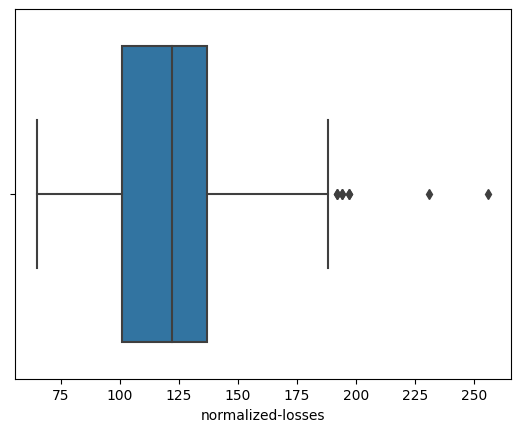

In [ ]:
# Visualizing the outlier
import seaborn as sns
sns.boxplot(x="normalized-losses", data=data)

In [ ]:
data['normalized-losses'].describe()

count    201.00000
mean     122.00000
std       31.99625
min       65.00000
25%      101.00000
50%      122.00000
75%      137.00000
max      256.00000
Name: normalized-losses, dtype: float64

#### Z-Score

In [ ]:
# Outlier detection using Z score
from scipy import stats
hp_zscore = np.abs(stats.zscore(data['normalized-losses']))
hp_zscore

0      0.000000
1      0.000000
2      0.000000
3      1.315931
4      1.315931
         ...   
196    0.845956
197    0.845956
198    0.845956
199    0.845956
200    0.845956
Name: normalized-losses, Length: 201, dtype: float64

In [ ]:
# Set a threshold
threshold = hp_zscore.max()

# Position of the outlier
index_val = np.where(hp_zscore >= threshold)
data.iloc[index_val]['normalized-losses']

186    256
Name: normalized-losses, dtype: int64

In [ ]:
# Drop the row that has the outlier
new_data = data.drop(index=data.iloc[index_val]['normalized-losses'].index)
new_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


#### IQR

In [ ]:
# Calculate the upper and lower limits
Q1 = data['length'].quantile(0.25)
Q3 = data['length'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['length']>=upper)[0]
lower_array = np.where(data['length']<=lower)[0]

In [ ]:
Q1

166.8

In [ ]:
Q3

183.5

In [ ]:
print(upper_array, lower_array)

[] [17]


In [ ]:
# Removing the outliers
#data.drop(index=upper_array) - upper array is empty
data.drop(index=lower_array)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


## Data Exploration

Data exploration involves examining the summary statistics, visualizing the data distribution and understanding the relationship between variables.

### Exploring the summary statistics

To understand how the data is distributed, we can leverage some in-built functions to get the overall summary of the data. This helps in picking the right visualization and preprocessing techniques.


#### Describe

Let's first take a look at the variables by utilizing a description method. The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

- Count of that variable
- Mean
- Standard Deviation (std)
- Minimum Value
- IQR (Interquartile Range: 25%, 50% and 75%)
- Maximum Value

We can apply the method "describe" as follows:

In [ ]:
# Apply describe method
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,5.692289,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,16.616706,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.600000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,122.000000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


 The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [ ]:
data.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


#### Value Counts
Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".

In [ ]:
# Apply value counts
data['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

We can convert the series to a Dataframe as follows :

In [ ]:
# Convert the series to dataframe
data['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column  'drive-wheels' to 'value_counts'.

In [ ]:
drive_wheels_counts = data['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engine-location'.

In [ ]:
# engine-location as variable
engine_loc_counts = data['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

#### Grouping
The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [ ]:
# Get the unique values
data['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".

In [ ]:
df_group_one = data[['drive-wheels','price']]
df_group_one.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

You can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.

In [ ]:
# grouping results
df_gptest = data[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:

In [ ]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.

In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

To get a better measure of the important characteristics affecting car price, we look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?

### Correlation and Causation

**Correlation:** a measure of the extent of interdependence between variables.

**Causation:** the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

**Pearson Correlation**

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

- **1:** Total positive linear correlation.

- **0:** No linear correlation, the two variables most likely do not affect each other.

- **-1:** Total negative linear correlation.
Pearson Correlation is the default method of the function "corr".

Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

In [ ]:
# Get correlation
corre = data.corr()

<ipython-input-213-e7e03db363b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre = data.corr()


In [ ]:
import seaborn as sns

<Axes: >

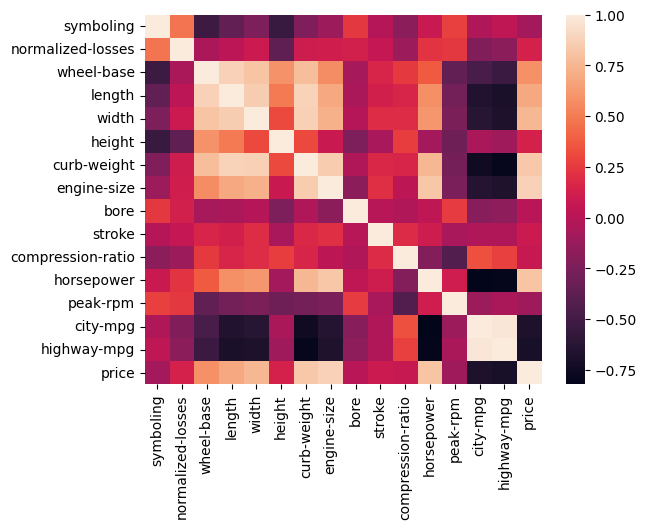

In [ ]:
sns.heatmap(corre)

Sometimes we would like to know the significant of the correlation estimate.

**P-value:**

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

- p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.
- p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.
- p-value is $<$ 0.1: there is weak evidence that the correlation is significant.
- p-value is $>$ 0.1: there is no evidence that the correlation is significant.

We can obtain this information using "stats" module in the "scipy" library.

In [ ]:
# Import necessary libraries
from scipy import stats

Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['wheel-base'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20


Conclusion:
Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['horsepower'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428259557e-48


Conclusion:
Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)



Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['engine-size'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198793e-64


Conclusion:
Since the p-value is  <  0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

### ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

- F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

- P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

Let's see if different types 'drive-wheels' impact 'price', we group the data.

Let's see if different types 'drive-wheels' impact 'price', we group the data.

In [ ]:
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [ ]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


We can obtain the values of the group using the method "get_group".

In [ ]:
grouped_test2.get_group('4wd')['price'] #'price' column for the group with the 'drive-wheels' value equal to '4wd'.

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

We can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])

print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Categorical variables:
- Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

## Data Visualization

Visualizing data helps in understanding the characteristics of the variables easily. Graphs and charts can be used to visualize data. Refer to the visualization class to learn in-depth about the different types of charts and graphs.


### How to choose the right visualization method?
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.


### Types of visualization
- Univariate analysis: Distribution of single variables
  - histograms, and box plots
- Bivariate analysis: Relationships between two variables (pair-wise)
  - scatter plots, correlation, and heatmap
- Multivariate analysis: Compare multiple variables at the same time
  - pair plots, dimensionality reduction
- Advanced visualization techniques: Analyze complex data and represent them using special graphs
  - time series, geospatial data, and interactive plots

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline

Let's use a heat map to visualize the relationship between Body Style vs Price.

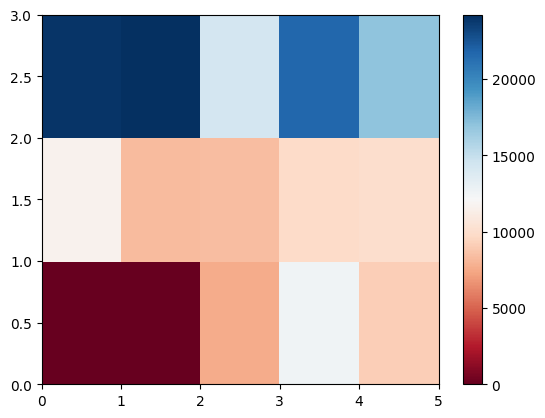

In [ ]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

The default labels convey no useful information to us. Let's change that:

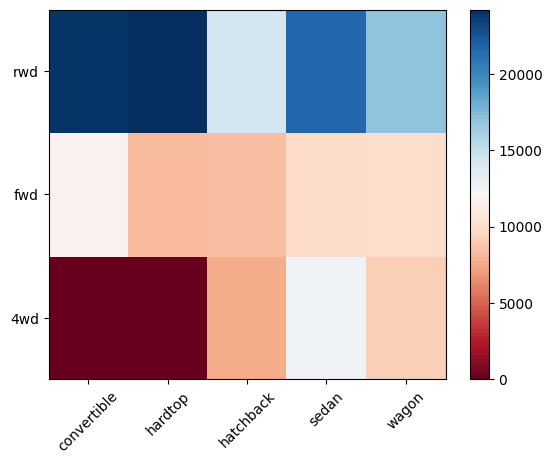

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=45)

fig.colorbar(im)
plt.show()

Let's look at the relationship between "body-style" and "price".

<Axes: xlabel='body-style', ylabel='price'>

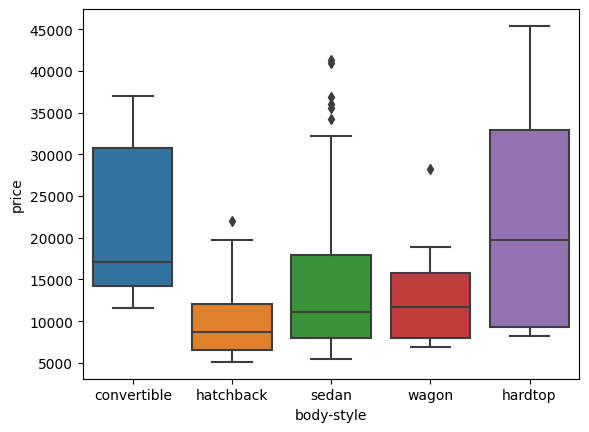

In [ ]:
sns.boxplot(x="body-style", y="price", data=data)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

<Axes: xlabel='engine-location', ylabel='price'>

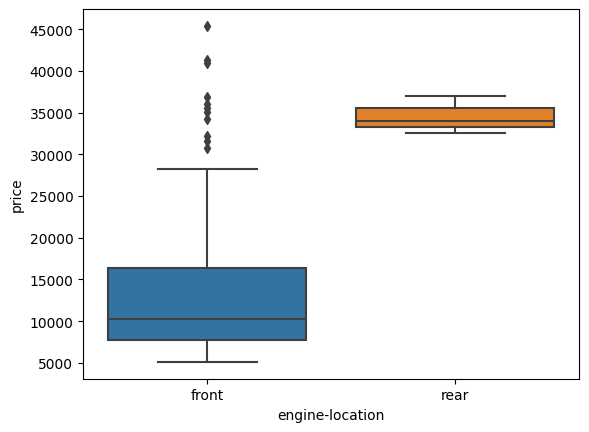

In [ ]:
sns.boxplot(x="engine-location", y="price", data=data)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

# Feature Engineering
Feature engineering is a subset of data preparation but is a crucial step in its own right that helps improve the performance of machine learning models. It involves two steps,

- Feature Extraction: Creating new features or transforming existing features.
This step can involve techniques like one-hot encoding, feature scaling, creating interaction terms, generating new features, and dealing with high cardinality features.

  - Data standardization,
  - Data normalization,
  - Identifyng outliers,
  - Binning,
  - One-hot encoding,
  - Polynomial feature transformation,
  - Feature splitting, and
  - Dimensionality reduction

- Feature Selection: Selecting the right set of features for modeling.
  - Filter methods,
  - Wrapper methods,
  - Embedded methods,
  - Feature importance ranking,
  - Using cross-validation, and
  - Domain knowledge


**Why do we do feature engineering?**

Feature engineering aims to capture meaningful information from the data and make it more suitable for modeling.

## Feature Extraction

### Data Standardization
Data is usually collected from different sources with different formats. (Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)

**What is Standardization?**

Standardization is the process of transforming data into a common format which allows the researcher to make meaningful comparison.

**Example:**

**Transform mpg to L/100km:**

In our automobile dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard. We will need to apply data transformation to transform mpg into L/100km.

The formula for unit conversion is

**L/100km = 235 / mpg**

We can do many mathematical operations directly in Pandas.

In [ ]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
data['city-L/100km'] = 235/data["city-mpg"]

# check your transformed data
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a sample dataset (2D array)
data1 = [[1, 2], [3, 4], [5, 6]]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it
standardized_data = scaler.fit_transform(data1)

print("Original Data:")
print(data1)

print("\nStandardized Data:")
print(standardized_data)


Original Data:
[[1, 2], [3, 4], [5, 6]]

Standardized Data:
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]



* Mean of the first column

(mean1) = (1 + 3 + 5) / 3 = 3
* Standard Deviation of the first column

(std1) = sqrt((1 + 1 + 1) / 3) ≈ 1.63299
* Mean of the second column

(mean2) = (2 + 4 + 6) / 3 = 4
* Standard Deviation of the second column

(std2) = sqrt((4 + 4 + 4) / 3) ≈ 1.63299

###  Data Normalization

**What is normalization?**

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1. There are two methods,

**Min-Max Scaling:**

This process involves rescaling all values in a feature from 0 to 1. In other words, the minimum value in the original range will take 0, the maximum value will take 1, and the rest of the values between the two extremes will be appropriately scaled.

**Standardization/Variance scaling:**

All the data points are subtracted by their mean, and the result is divided by the distribution's variance to arrive at a distribution with a 0 mean and variance of 1.

Example:

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".

**Target:** would like to Normalize those variables so their value ranges from 0 to 1.

**Approach:** replace original value by (original value)/(maximum value)

In [ ]:
# replace (original value) by (original value)/(maximum value)
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()

In [ ]:
data[['length', 'width', 'height']]

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
...,...,...,...
196,0.907256,0.956944,0.928094
197,0.907256,0.955556,0.928094
198,0.907256,0.956944,0.928094
199,0.907256,0.956944,0.928094


Here we can see, we've normalized "length", "width" and "height" in the range of [0,1].

### Binning

**What is binning?**

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

Example:

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.

Lets plot the histogram of horspower, to see what the distribution of horsepower looks like.

Text(0.5, 1.0, 'horsepower bins')

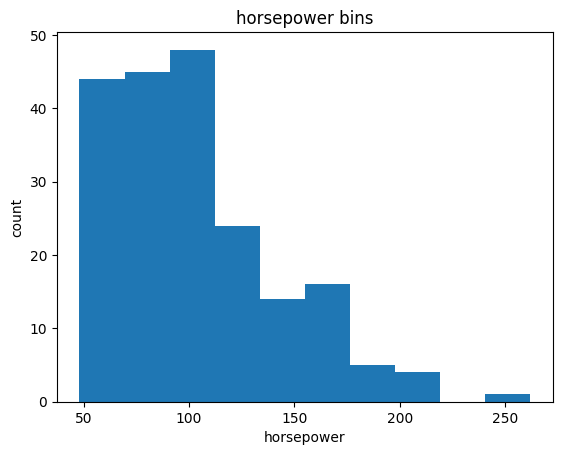

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(data["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

- Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).

- Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).

- Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.

We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

In [ ]:
bins = np.linspace(min(data["horsepower"]), max(data["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
# Set group names
group_names = ['Low', 'Medium', 'High']

# Bin the horsepower
data['horsepower-binned'] = pd.cut(data['horsepower'], bins, labels=group_names, include_lowest=True )
data[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
9,101.0,Low


In [ ]:
# Get the number of cars belonging to each category
data["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

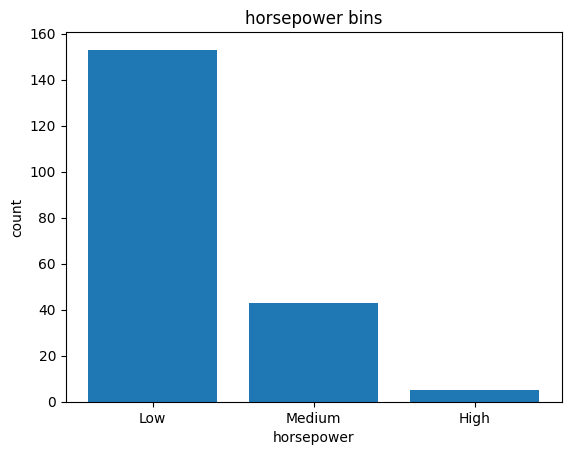

In [ ]:
# Let's plot it
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, data["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### One-hot encoding / Indicator variable (or dummy variable)

**What is an indicator variable?**

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

Example:

We see the column "fuel-type" has two unique values, "gas" or "diesel". ML model doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.

We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type.

In [ ]:
# Check the category
data['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [ ]:
# Create dummy variable
dummy_variable_1 = pd.get_dummies(data["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# merge data frame "df" and "dummy_variable_1"
data = pd.concat([data, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
data.drop("fuel-type", axis = 1, inplace=True)

In [ ]:
# Create dummy variable
dummy_variable_2 = pd.get_dummies(data["body-style"])
dummy_variable_2.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:
# merge data frame "df" and "dummy_variable_2"
data = pd.concat([data, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
data.drop("body-style", axis = 1, inplace=True)

In [ ]:
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,price,city-L/100km,horsepower-binned,diesel,gas,convertible,hardtop,hatchback,sedan,wagon
0,3,122,alfa-romero,std,two,rwd,front,88.6,0.811148,0.890278,...,13495.0,11.190476,Low,0,1,1,0,0,0,0
1,3,122,alfa-romero,std,two,rwd,front,88.6,0.811148,0.890278,...,16500.0,11.190476,Low,0,1,1,0,0,0,0
2,1,122,alfa-romero,std,two,rwd,front,94.5,0.822681,0.909722,...,16500.0,12.368421,Medium,0,1,0,0,1,0,0
3,2,164,audi,std,four,fwd,front,99.8,0.848630,0.919444,...,13950.0,9.791667,Low,0,1,0,0,0,1,0
4,2,164,audi,std,four,4wd,front,99.4,0.848630,0.922222,...,17450.0,13.055556,Low,0,1,0,0,0,1,0


### Polynomial feature transformation

**What are polynomial features?**

Polynomial features are those features created by raising existing features to an exponent. The features created include:

- The bias (the value of 1.0)
- Values raised to a power for each degree (e.g. x^1, x^2, x^3, …)
- Interactions between all pairs of features (e.g. x1 * x2, x1 * x3, …)


Example:

In our dataset, using the length and width of the car, we can calculate the square footage of the car as a new feature.

**Length x Width = Square Footage.**



In [ ]:
# Calculating the square footage of the car
data['square_footage'] = data['length'] * data['width'] # remember we are working with scaled length and width
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,city-L/100km,horsepower-binned,diesel,gas,convertible,hardtop,hatchback,sedan,wagon,square_footage
0,3,122,alfa-romero,std,two,rwd,front,88.6,0.811148,0.890278,...,11.190476,Low,0,1,1,0,0,0,0,0.722147
1,3,122,alfa-romero,std,two,rwd,front,88.6,0.811148,0.890278,...,11.190476,Low,0,1,1,0,0,0,0,0.722147
2,1,122,alfa-romero,std,two,rwd,front,94.5,0.822681,0.909722,...,12.368421,Medium,0,1,0,0,1,0,0,0.748412
3,2,164,audi,std,four,fwd,front,99.8,0.848630,0.919444,...,9.791667,Low,0,1,0,0,0,1,0,0.780269
4,2,164,audi,std,four,4wd,front,99.4,0.848630,0.922222,...,13.055556,Low,0,1,0,0,0,1,0,0.782626


In [ ]:
# Length and width can be dropped
data.drop(['length', 'width'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'drive-wheels', 'engine-location', 'wheel-base', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km',
       'horsepower-binned', 'diesel', 'gas', 'convertible', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'square_footage'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Create some sample data
X = np.array([[1, 2], [3, 4], [5, 6]])

# Initialize the PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree=2)

# Transform the features
X_poly = poly.fit_transform(X)

print("Original Data:")
print(X)

# 1: Constant term (bias)
# x1: Value of the first feature
# x2: Value of the second feature
# x1^2: Square of the first feature
# x1*x2: Product of the first and second features
# x2^2: Square of the second feature

print("\nTransformed Data:")
print(X_poly)


Original Data:
[[1 2]
 [3 4]
 [5 6]]

Transformed Data:
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]
 [ 1.  5.  6. 25. 30. 36.]]


### Feature Splitting

Splitting features into parts can sometimes improve the value of the features toward the target to be learned.

Example:

For instance, in this case, Date better contributes to the target function than Date and Time.


In [ ]:
# Assume date of the make of the model is available in the data
import datetime
import random

def create_date(date_1, date_2, n, seed):
    """Given a range of dates, return n random dates between the range in a dataframe.
    Example dates:
        2016-01-02
        2017-10-23
        2018-07-19
    """
    # start_date = datetime.datetime.strptime(date_1, '%Y-%m-%d')
    # end_date = datetime.datetime.strptime(date_2, '%Y-%m-%d')
    # dates = pd.date_range(start_date, end_date, freq='D')
    # dates = pd.DataFrame(dates)
    # #dates = dates.strftime('%Y-%m-%d')
    # #dates = dates.sample(n=n, random_state=seed)
    # return dates
    start_date = datetime.datetime.strptime(date_1, '%Y-%m-%d')
    end_date = datetime.datetime.strptime(date_2, '%Y-%m-%d')
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    dates = dates.strftime('%Y-%m-%d')
    dates = dates.tolist()
    random.seed(seed)
    random.shuffle(dates)
    dates = dates[:n]
    return dates

In [ ]:
data['date_of_make'] = create_date('2010-01-01', '2023-01-01', 201, 10)
data['date_of_make'] = data['date_of_make'].apply(pd.to_datetime)
data['date_of_make']

0     2010-07-29
1     2010-10-11
2     2013-06-30
3     2018-03-15
4     2022-02-02
         ...    
196   2017-06-02
197   2020-03-23
198   2013-03-10
199   2019-10-03
200   2014-06-13
Name: date_of_make, Length: 201, dtype: datetime64[ns]

In [ ]:
# Extract day of the week
data['day_of_week'] = data['date_of_make'].dt.day_name()
data['day_of_week']

0       Thursday
1         Monday
2         Sunday
3       Thursday
4      Wednesday
         ...    
196       Friday
197       Monday
198       Sunday
199     Thursday
200       Friday
Name: day_of_week, Length: 201, dtype: object

In [ ]:
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,height,curb-weight,...,diesel,gas,convertible,hardtop,hatchback,sedan,wagon,square_footage,date_of_make,day_of_week
0,3,122,alfa-romero,std,two,rwd,front,88.6,0.816054,2548,...,0,1,1,0,0,0,0,0.722147,2010-07-29,Thursday
1,3,122,alfa-romero,std,two,rwd,front,88.6,0.816054,2548,...,0,1,1,0,0,0,0,0.722147,2010-10-11,Monday
2,1,122,alfa-romero,std,two,rwd,front,94.5,0.876254,2823,...,0,1,0,0,1,0,0,0.748412,2013-06-30,Sunday
3,2,164,audi,std,four,fwd,front,99.8,0.908027,2337,...,0,1,0,0,0,1,0,0.780269,2018-03-15,Thursday
4,2,164,audi,std,four,4wd,front,99.4,0.908027,2824,...,0,1,0,0,0,1,0,0.782626,2022-02-02,Wednesday


### Dimensionality Reduction

Dimensionality reduction is a technique used to reduce the number of features in a dataset while retaining as much of the important information as possible. In other words, it is a process of transforming high-dimensional data into a lower-dimensional space that still preserves the essence of the original data.

**Why do we do dimensionality reduction?**

- To remove redundant features.
- Reduce the computation.
- Reduce memory requirements.
- Reduce the complexity of the data.

**Dimensionality Reduction Techniques:**

- Principal Component Analysis (PCA): Reduces dimensionality by projecting the data onto a lower-dimensional subspace while preserving as much variance as possible. The resulting principal components can serve as new features.

- Linear Discriminant Analysis (LDA): Similar to PCA but considers class information to maximize the separability between classes.

In [ ]:
from sklearn.decomposition import PCA

# Subset a group of columns for demonstration
new_data = data[['square_footage', 'diesel', 'gas', 'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', 'horsepower', 'engine-size', 'price']]

# Create PCA
pca_data = PCA(n_components=2)
pc_data = pca_data.fit_transform(new_data)

In [ ]:
pca_data_df = pd.DataFrame(data = pc_data, columns = ['principal component 1', 'principal component 2'])
pca_data_df


,principal component 1,principal component 2
0,287.908729,6.160934
1,3292.855709,-11.388975
2,3293.119695,35.762205
3,742.770678,-16.824302
4,4242.881541,-10.032196
...,...,...
196,3637.911212,-4.079832
197,5838.047492,18.497532
198,8278.051409,4.634424
199,9262.799764,-40.548601


In [ ]:
print('Explained variation per principal component: {}'.format(pca_data.explained_variance_ratio_))


Explained variation per principal component: [9.99985837e-01 9.98862927e-06]


From the above output, you can observe that the principal component 1 holds 99.9% of the information while the principal component 2 holds only 1% of the information.

#### PCA on classification task

We start with the wine dataset, which is a classification dataset with 13 features (i.e., the dataset is 13 dimensional) and 3 classes. There are 178 samples:


X shape: (178, 13)
y shape: (178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


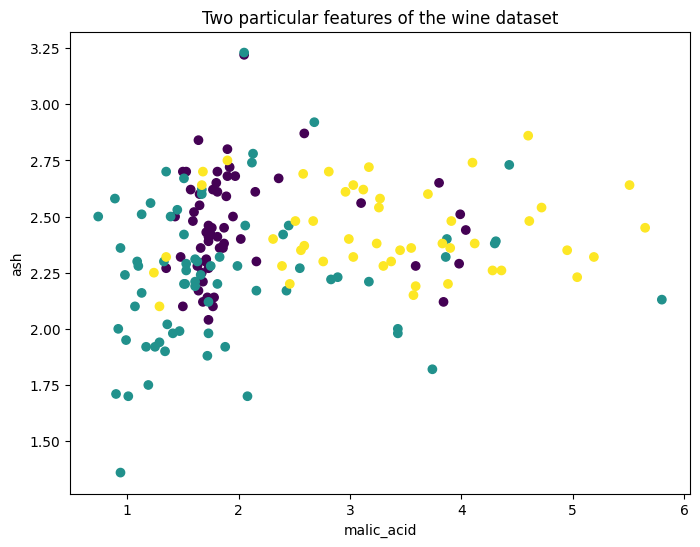

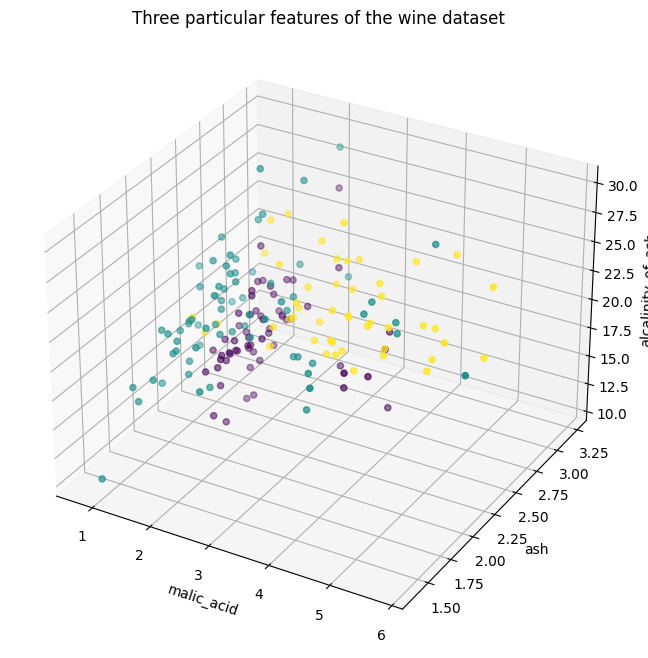

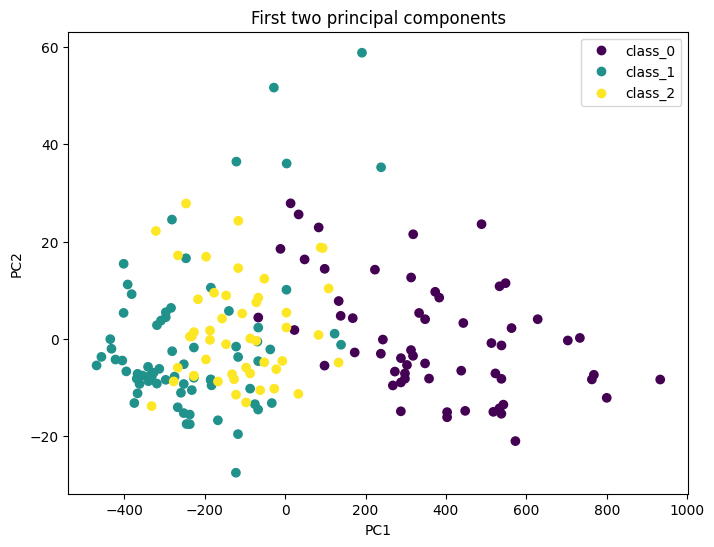

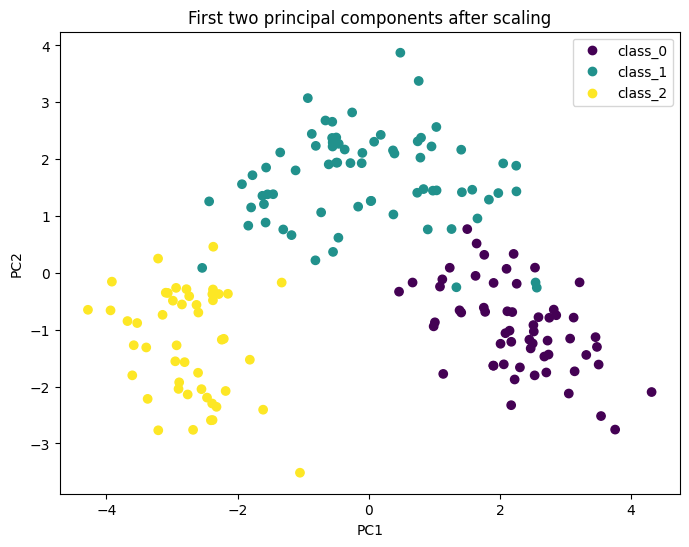

In [ ]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load dataset
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print("X shape:", X.shape)
print("y shape:", y.shape)
print(winedata.feature_names)

# Show any two features
plt.figure(figsize=(8,6))
plt.scatter(X[:,1], X[:,2], c=y)
plt.xlabel(winedata["feature_names"][1])
plt.ylabel(winedata["feature_names"][2])
plt.title("Two particular features of the wine dataset")
plt.show()

# Show any three features
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], c=y)
ax.set_xlabel(winedata["feature_names"][1])
ax.set_ylabel(winedata["feature_names"][2])
ax.set_zlabel(winedata["feature_names"][3])
ax.set_title("Three particular features of the wine dataset")
plt.show()

# Show first two principal components without scaler
pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()

# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()

## Feature selection

Feature selection is an essential step in the machine learning pipeline that involves choosing a subset of relevant features from the original feature set to improve model performance, reduce overfitting, and decrease computational complexity. Several techniques can be used for feature selection, depending on the dataset and the problem you are trying to solve. Here are some commonly used techniques:


### Filter Methods

  - **Correlation-based Selection:** Identify and keep features that have a strong correlation with the target variable while removing redundant features that are highly correlated with each other.

  - **Statistical Tests:** Utilize statistical tests like chi-squared for classification tasks or ANOVA for regression tasks to measure the significance of individual features and select the most informative ones.

### Wrapper Methods

  - **Recursive Feature Elimination (RFE):** This method recursively fits the model with all features, ranks the importance of each feature, and removes the least important feature in each iteration until the desired number of features is reached.

  - **Forward Selection:** Start with an empty set of features and iteratively add the most important feature based on model performance until a stopping criterion is met.

  - **Backward Elimination:** Start with all features and iteratively remove the least important feature based on model performance until a stopping criterion is met.

  - **Stepwise Selection:** A combination of forward selection and backward elimination, where features are added or removed in a stepwise manner.

### Embedded Methods

- **L1 Regularization (Lasso):** L1 regularization encourages sparsity in the model by penalizing the absolute values of feature coefficients, effectively performing feature selection during model training.

- **Tree-based Methods:** Decision tree-based algorithms like Random Forest and XGBoost provide feature importances that can be used for feature selection.

- **Feature Importance from Gradient Boosting Models:** Algorithms like LightGBM and CatBoost also offer feature importances.


### Feature Importance Ranking

- **Permutation Importance:** Measure the impact of shuffling a feature on model performance. Features with the greatest negative impact are considered important.

- **Mean Decrease in Impurity (MDI):** For tree-based models, this method ranks features based on the reduction in impurity (e.g., Gini impurity) they contribute to the tree.


### Feature Selection Using Cross-Validation

Perform feature selection within a cross-validation loop to ensure that feature selection decisions are not influenced by the test set.

### Domain Knowledge

Sometimes, domain knowledge and expert insights can help identify and select relevant features based on their significance in the context of the problem.


The choice of feature selection technique depends on the dataset, the problem type (classification or regression), computational resources, and the specific goals of your machine learning project. It's often a good practice to try multiple techniques and compare their results to determine which one works best for your particular scenario.

# Feature engineering for textual data

Feature engineering for text data is a crucial step in natural language processing (NLP) and machine learning tasks involving textual information. It involves transforming raw text into a structured format that machine learning models can understand and use effectively. Here are some common techniques and strategies for feature engineering with text data:

**Data Preprocessing/Data Preparation:**

Data can be cleaned and standardized to a common format using the below steps,
  - **Tokenization:** Text is broken into smaller units called tokens (word, char).
  - **Text Normalization:** Text is converted to a proper format using the following techniques,
    - Lowercasing: Converting all text to lowercase to ensure consistency.
    - Removing punctuation and special characters.
    - Removing stop words: Common words (e.g., "the," "and") that may not be informative.
    - Stemming and Lemmatization: Reducing words to their root forms (e.g., "running" to "run").

**Feature Extraction:**
After tokenization and preprocessing, you can extract various features from text data, such as:

- **Bag of Words (BoW):** Representing text as a vector of word frequencies or binary values for each document.
- **TF-IDF (Term Frequency-Inverse Document Frequency)**: Assigning weights to words based on their importance in the document and corpus.
- **Word Embeddings:** Using pre-trained word embeddings like Word2Vec, GloVe, or fastText to capture semantic relationships between words.
- **Sentence-level embeddings:** Capturing sentence-level patterns in text using techniques like sentence embeddings.
- **Document embeddings:** Representing entire documents as vectors (e.g., Doc2Vec).

**Feature Selection:**

Apply feature selection techniques to reduce dimensionality and focus on the most informative features.

Remember that the choice of feature engineering techniques for text data should align with the specific NLP task you are working on, whether it's text classification, sentiment analysis, information retrieval, or any other task. Experimentation and domain knowledge play a significant role in determining which features and techniques are most effective for your particular problem.